In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First, we import the data

In [2]:
df = pd.read_csv('data/part_D_aggregated_over_uses.csv')

In [3]:
pd.options.display.max_columns = 60
df.head(10)

,PHARM_CLASSES,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Beneficiary Count No LIS, 2011","Beneficiary Count LIS, 2011","Claim Count, 2012","Total Spending, 2012","Beneficiary Count, 2012","Total Annual Spending Per User, 2012","Unit Count, 2012","Beneficiary Count No LIS, 2012","Beneficiary Count LIS, 2012","Claim Count, 2013","Total Spending, 2013","Beneficiary Count, 2013","Total Annual Spending Per User, 2013","Unit Count, 2013","Beneficiary Count No LIS, 2013","Beneficiary Count LIS, 2013","Claim Count, 2014","Total Spending, 2014","Beneficiary Count, 2014","Total Annual Spending Per User, 2014","Unit Count, 2014","Beneficiary Count No LIS, 2014","Beneficiary Count LIS, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Beneficiary Count No LIS, 2015","Beneficiary Count LIS, 2015"
0,"5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase ...",7962.0,5.406118e+06,1950.0,4255.233843,9.978270e+05,903.0,1047.0,8310.0,1.014786e+07,1916.0,9148.808431,1.057492e+06,944.0,972.0,8089.0,1.632054e+07,1830.0,14896.027965,1.124700e+06,1017.0,813.0,7193.0,1.864641e+07,1516.0,21095.818003,1.012663e+06,823.0,693.0,6444.0,2.179239e+07,1465.0,26604.432699,8.878410e+05,806.0,659.0
1,"5-alpha Reductase Inhibitor [EPC],5-alpha Redu...",5030612.0,4.190362e+08,947130.0,2103.836100,2.348624e+08,695061.0,251962.0,5287304.0,3.877246e+08,1010171.0,2223.340712,2.574083e+08,752804.0,257230.0,5960487.0,4.361689e+08,1170985.0,2386.623519,3.124059e+08,901569.0,269390.0,6307170.0,4.272494e+08,1276560.0,2112.467898,3.331540e+08,990204.0,286356.0,6619473.0,3.835684e+08,1469893.0,2428.968618,3.619368e+08,1138077.0,331816.0
2,Acetyl Aldehyde Dehydrogenase Inhibitors [MoA]...,23339.0,2.887068e+06,7987.0,715.150400,7.801222e+05,2401.0,5586.0,24057.0,2.871170e+06,7149.0,795.013585,8.249415e+05,2533.0,4616.0,26051.0,3.012239e+06,7510.0,857.123733,8.987575e+05,3018.0,4492.0,26514.0,2.755405e+06,7486.0,768.675965,9.150344e+05,3264.0,4222.0,27870.0,2.704885e+06,7879.0,881.616864,9.837555e+05,3379.0,4466.0
3,"Acetylcholine Release Inhibitor [EPC],Acetylch...",5635.0,6.661903e+06,3051.0,3884.767180,1.181800e+04,1294.0,1727.0,7541.0,8.709997e+06,3981.0,3617.001597,1.479140e+04,1884.0,2097.0,11134.0,1.281318e+07,5688.0,3947.576300,2.111800e+04,2817.0,2871.0,14284.0,1.694227e+07,7051.0,5845.786390,2.620700e+04,3339.0,3712.0,17599.0,2.146734e+07,8311.0,7704.994357,3.167100e+04,3852.0,4459.0
4,"Acetylcholine Releasing Agent [EPC],Increased ...",34.0,2.016420e+03,0.0,0.000000,8.990000e+03,0.0,0.0,29.0,2.045950e+03,0.0,0.000000,9.060000e+03,0.0,0.0,20.0,1.647630e+03,0.0,0.000000,7.600000e+03,0.0,0.0,24.0,1.822860e+03,0.0,0.000000,8.752000e+03,0.0,0.0,34.0,1.944510e+03,0.0,0.000000,8.540000e+03,0.0,0.0
5,"Acidifying Activity [MoA],Calculi Dissolution ...",200323.0,2.378398e+07,51211.0,969.171611,2.644951e+07,36015.0,15158.0,231281.0,2.905019e+07,55976.0,915.860646,3.090201e+07,39945.0,16031.0,274899.0,3.701593e+07,67908.0,1141.803696,3.762456e+07,50841.0,17067.0,310788.0,5.664551e+07,76528.0,1481.948132,4.212526e+07,57842.0,18686.0,348420.0,6.452374e+07,84871.0,1867.519669,4.650351e+07,64146.0,20725.0
6,"Adenosine Deaminase [Chemical/Ingredient],Bovi...",0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,0.0,13.0,1.224835e+06,0.0,0.000000,4.080000e+02,0.0,0.0,13.0,1.294159e+06,0.0,0.000000,4.680000e+02,0.0,0.0
7,"Adrenergic Agonists [MoA],Adrenergic Receptor ...",54764.0,5.978621e+06,24416.0,464.181403,3.025455e+05,9771.0,14645.0,40873.0,4.018894e+06,16244.0,527.453920,2.330860e+05,7936.0,8308.0,47466.0,4.144563e+06,17704.0,676.390445,2.784655e+05,9696.0,8008.0,44814.0,3.439348e+06,17157.0,674.085550,2.722778e+05,10410.0,6747.0,43357.0,3.081022e+06,17264.0,751.154383,2.628915e+05,11185.0,6079.0
8,"Adrenergic alpha-Agonists 

Recall that the year-over-year change is the ratio of the annual difference to the previous year's value, where the annual difference is the difference between the current value and the previous year's value. In other words for a series $a_t$, we compute:
$$\frac{a_t-a_{t-1}}{a_{t-l}},$$
where $t$ is the given year.

Let's compute these for various columns:

In [4]:
columns_of_interest = ['Total Spending,','Claim Count,']
years = [2012,2013,2014,2015]
for i,column in enumerate(columns_of_interest):
    print("Computing year-over-year increase for "+column+
          " number %d of %d"%(i+1,len(columns_of_interest)))
    for year in years:
        df[column+' YOY increase '+str(year)] = (df[column+' '+str(year)]
                                                 -df[column+' '+str(year-1)])/df[column+' '+str(year-1)]

Computing year-over-year increase for Total Spending, number 1 of 2
Computing year-over-year increase for Claim Count, number 2 of 2


In [5]:
df.head(10)

,PHARM_CLASSES,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Beneficiary Count No LIS, 2011","Beneficiary Count LIS, 2011","Claim Count, 2012","Total Spending, 2012","Beneficiary Count, 2012","Total Annual Spending Per User, 2012","Unit Count, 2012","Beneficiary Count No LIS, 2012","Beneficiary Count LIS, 2012","Claim Count, 2013","Total Spending, 2013","Beneficiary Count, 2013","Total Annual Spending Per User, 2013","Unit Count, 2013","Beneficiary Count No LIS, 2013","Beneficiary Count LIS, 2013","Claim Count, 2014","Total Spending, 2014","Beneficiary Count, 2014","Total Annual Spending Per User, 2014","Unit Count, 2014","Beneficiary Count No LIS, 2014","Beneficiary Count LIS, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Beneficiary Count No LIS, 2015","Beneficiary Count LIS, 2015","Total Spending, YOY increase 2012","Total Spending, YOY increase 2013","Total Spending, YOY increase 2014","Total Spending, YOY increase 2015","Claim Count, YOY increase 2012","Claim Count, YOY increase 2013","Claim Count, YOY increase 2014","Claim Count, YOY increase 2015"
0,"5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase ...",7962.0,5.406118e+06,1950.0,4255.233843,9.978270e+05,903.0,1047.0,8310.0,1.014786e+07,1916.0,9148.808431,1.057492e+06,944.0,972.0,8089.0,1.632054e+07,1830.0,14896.027965,1.124700e+06,1017.0,813.0,7193.0,1.864641e+07,1516.0,21095.818003,1.012663e+06,823.0,693.0,6444.0,2.179239e+07,1465.0,26604.432699,8.878410e+05,806.0,659.0,0.877107,0.608274,0.142512,0.168718,0.043708,-0.026594,-0.110768,-0.104129
1,"5-alpha Reductase Inhibitor [EPC],5-alpha Redu...",5030612.0,4.190362e+08,947130.0,2103.836100,2.348624e+08,695061.0,251962.0,5287304.0,3.877246e+08,1010171.0,2223.340712,2.574083e+08,752804.0,257230.0,5960487.0,4.361689e+08,1170985.0,2386.623519,3.124059e+08,901569.0,269390.0,6307170.0,4.272494e+08,1276560.0,2112.467898,3.331540e+08,990204.0,286356.0,6619473.0,3.835684e+08,1469893.0,2428.968618,3.619368e+08,1138077.0,331816.0,-0.074723,0.124945,-0.020450,-0.102238,0.051026,0.127321,0.058164,0.049516
2,Acetyl Aldehyde Dehydrogenase Inhibitors [MoA]...,23339.0,2.887068e+06,7987.0,715.150400,7.801222e+05,2401.0,5586.0,24057.0,2.871170e+06,7149.0,795.013585,8.249415e+05,2533.0,4616.0,26051.0,3.012239e+06,7510.0,857.123733,8.987575e+05,3018.0,4492.0,26514.0,2.755405e+06,7486.0,768.675965,9.150344e+05,3264.0,4222.0,27870.0,2.704885e+06,7879.0,881.616864,9.837555e+05,3379.0,4466.0,-0.005507,0.049133,-0.085264,-0.018335,0.030764,0.082886,0.017773,0.051143
3,"Acetylcholine Release Inhibitor [EPC],Acetylch...",5635.0,6.661903e+06,3051.0,3884.767180,1.181800e+04,1294.0,1727.0,7541.0,8.709997e+06,3981.0,3617.001597,1.479140e+04,1884.0,2097.0,11134.0,1.281318e+07,5688.0,3947.576300,2.111800e+04,2817.0,2871.0,14284.0,1.694227e+07,7051.0,5845.786390,2.620700e+04,3339.0,3712.0,17599.0,2.146734e+07,8311.0,7704.994357,3.167100e+04,3852.0,4459.0,0.307434,0.471089,0.322253,0.267088,0.338243,0.476462,0.282917,0.232078
4,"Acetylcholine Releasing Agent [EPC],Increased ...",34.0,2.016420e+03,0.0,0.000000,8.990000e+03,0.0,0.0,29.0,2.045950e+03,0.0,0.000000,9.060000e+03,0.0,0.0,20.0,1.647630e+03,0.0,0.000000,7.600000e+03,0.0,0.0,24.0,1.822860e+03,0.0,0.000000,8.752000e+03,0.0,0.0,34.0,1.944510e+03,0.0,0.000000,8.540000e+03,0.0,0.0,0.014645,-0.194687,0.106353,0.066736,-0.147059,-0.310345,0.200000,0.416667
5,"Acidifying Activity [MoA],Calculi Dissolution ...",200323.0,2.378398e+07,51211.0,969.171611,2.644951e+07,36015.0,15158.0,231281.0,2.905019e+07,55976.0,915.860646,3.090201e+07,39945.0,16031.0,274899.0,3.701593e+07,67908.0,1141.803696,3.762456e+07,50841.0,17067.0,310788.0,5.664551e+07,76528.0,1481.948132,4.212526e+07,57842.0,18686.0,348420.0,6.452374e+07,84871.0,1867.519669,4.650351e+07,64146.0,20725.0,0.221418,0.274206,0.530301,0.139079,0.154540,0.188593,0.130553,0.121086
6,"Adenosine

Let's sort by the largest YOY spending increase in 2012, and explore the results:

In [6]:
year = 2012
column = columns_of_interest[0]
df_sorted = df.sort_values(by=column+' YOY increase '+str(year),ascending=False)

Let's take a look at the top 10 and bottom 5 changes in YOY spending

In [7]:
num_top = 10
num_bot = 5
df_tmp = df_sorted.replace([np.inf, -np.inf], np.nan).dropna(subset=[column+' YOY increase '+str(year) for year in years])
df_tmp = pd.concat([df_tmp.iloc[:num_top],df_tmp.iloc[-num_bot:]])

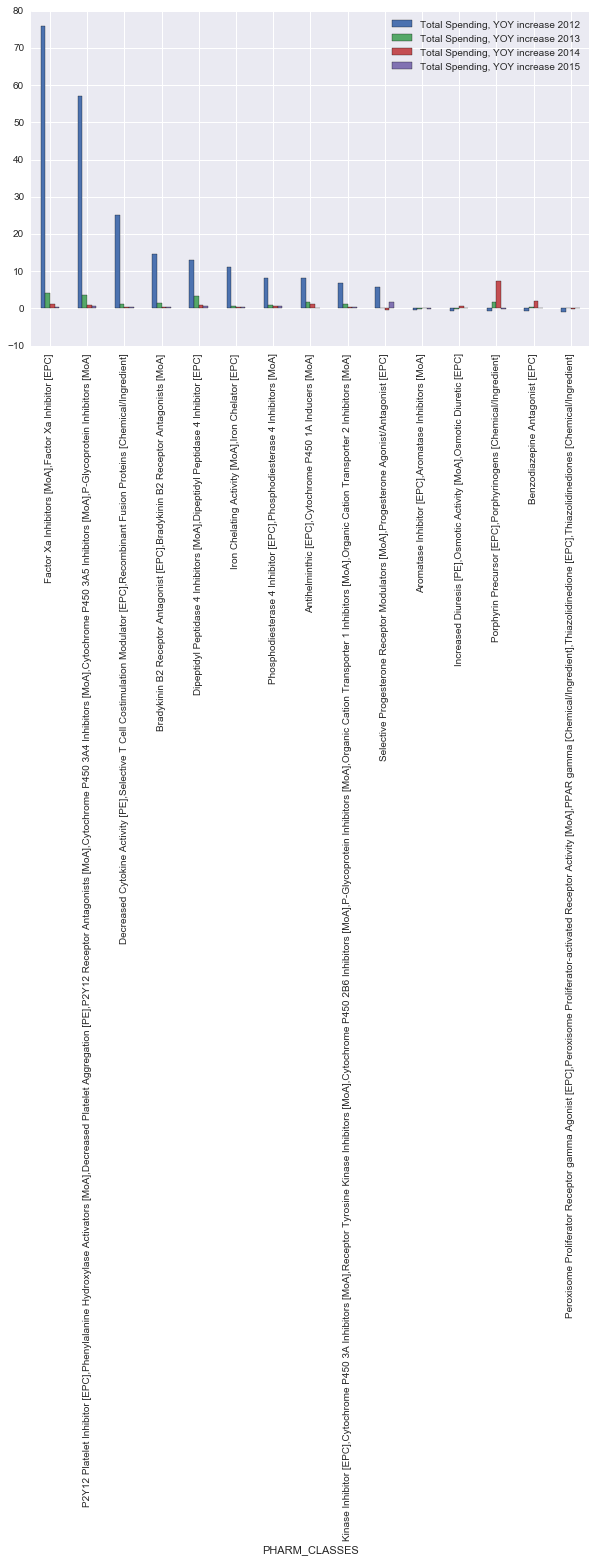

In [8]:
df_tmp[['PHARM_CLASSES']+
        [column+' YOY increase '+str(yr) for yr in years]].plot.bar(x = 'PHARM_CLASSES',
                                                                           figsize = (10,6))

There seems to be a lot of variation in terms of YOY spending increase... So let's add new column for the max of the absolute values of the YOY spending throughout all years:

In [9]:
df_tmp = df
for column in columns_of_interest:
    df_tmp.replace([np.inf, -np.inf], np.nan,inplace=True)
    df_tmp.dropna(subset=[column+' YOY increase '
                                      +str(year) for year in years],how='any',inplace=True)
    df_tmp[column+'YOY Max'] = np.abs(df_tmp[[column+' YOY increase '
                                             +str(yr) for yr in years]]).max(axis=1)

Let's sort and visualize the `num_top` results:

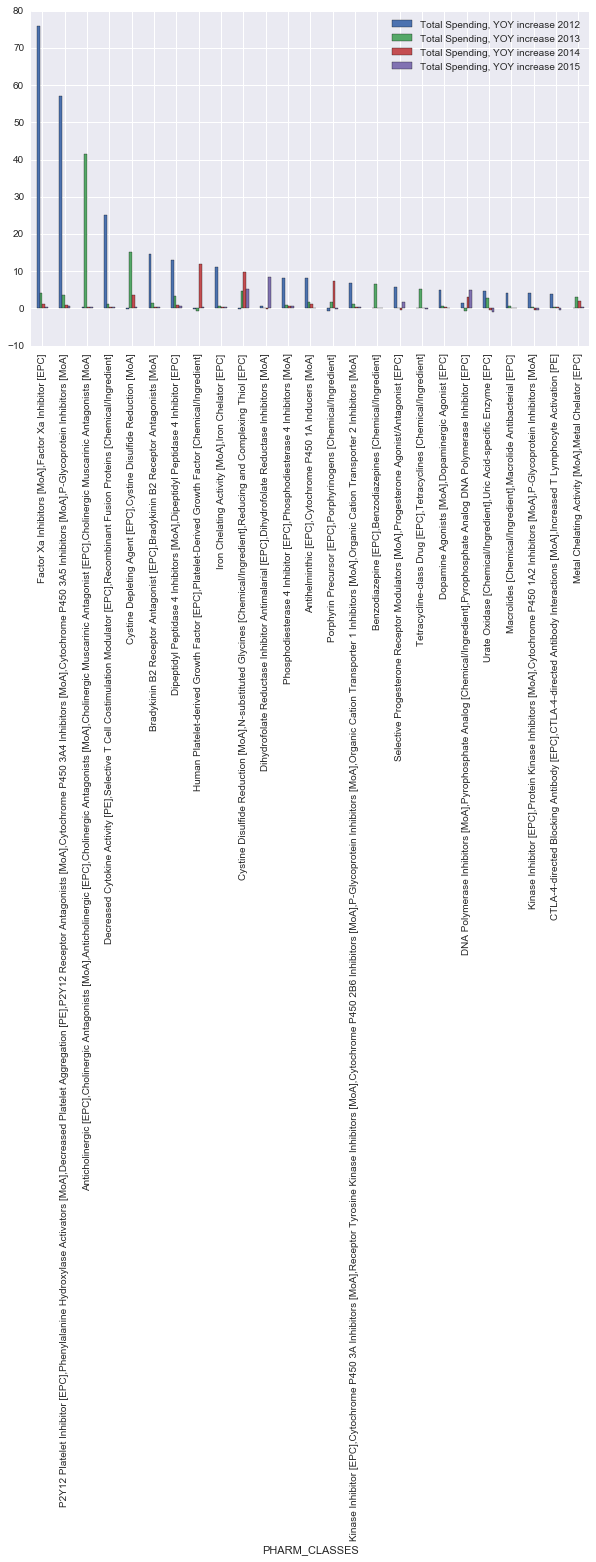

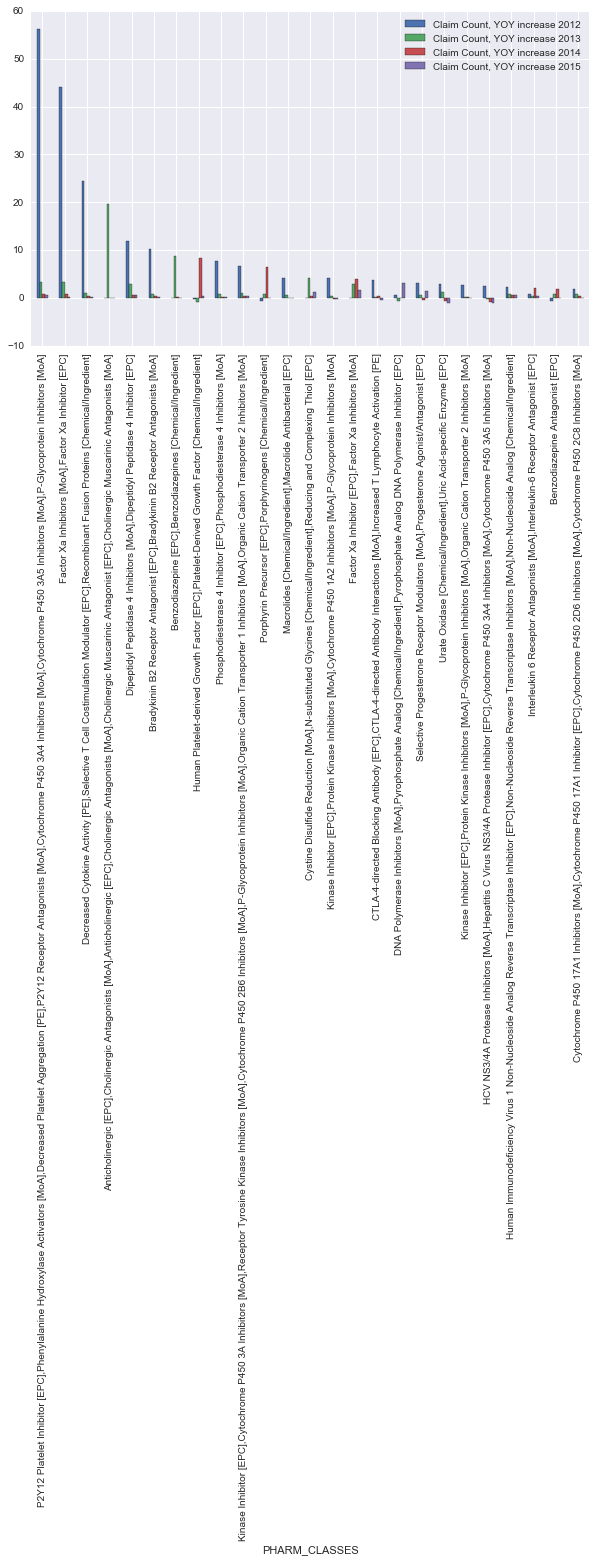

In [10]:
num_top = 25
for i,column in enumerate(columns_of_interest):
    df_sorted = df_tmp.sort_values(by=column+'YOY Max',ascending=False).iloc[:num_top]
    #df_tmp = df_sorted.dropna(subset=[column+' YOY increase '
    #                                  +str(year) for year in years],how='any').iloc[:num_top]

    df_sorted[['PHARM_CLASSES']+
            [column+' YOY increase '
             +str(yr) for yr in years]].plot.bar(x = 'PHARM_CLASSES',
                                                 figsize = (10,6))
    plt.show()

In [11]:
df_tmp

,PHARM_CLASSES,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Beneficiary Count No LIS, 2011","Beneficiary Count LIS, 2011","Claim Count, 2012","Total Spending, 2012","Beneficiary Count, 2012","Total Annual Spending Per User, 2012","Unit Count, 2012","Beneficiary Count No LIS, 2012","Beneficiary Count LIS, 2012","Claim Count, 2013","Total Spending, 2013","Beneficiary Count, 2013","Total Annual Spending Per User, 2013","Unit Count, 2013","Beneficiary Count No LIS, 2013","Beneficiary Count LIS, 2013","Claim Count, 2014","Total Spending, 2014","Beneficiary Count, 2014","Total Annual Spending Per User, 2014","Unit Count, 2014","Beneficiary Count No LIS, 2014","Beneficiary Count LIS, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Beneficiary Count No LIS, 2015","Beneficiary Count LIS, 2015","Total Spending, YOY increase 2012","Total Spending, YOY increase 2013","Total Spending, YOY increase 2014","Total Spending, YOY increase 2015","Claim Count, YOY increase 2012","Claim Count, YOY increase 2013","Claim Count, YOY increase 2014","Claim Count, YOY increase 2015","Total Spending,YOY Max","Claim Count,YOY Max"
0,"5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase ...",7962.0,5.406118e+06,1950.0,4.255234e+03,9.978270e+05,903.0,1047.0,8310.0,1.014786e+07,1916.0,9.148808e+03,1.057492e+06,944.0,972.0,8089.0,1.632054e+07,1830.0,1.489603e+04,1.124700e+06,1017.0,813.0,7193.0,1.864641e+07,1516.0,2.109582e+04,1.012663e+06,823.0,693.0,6444.0,2.179239e+07,1465.0,2.660443e+04,8.878410e+05,806.0,659.0,0.877107,0.608274,0.142512,0.168718,0.043708,-0.026594,-0.110768,-0.104129,0.877107,0.110768
1,"5-alpha Reductase Inhibitor [EPC],5-alpha Redu...",5030612.0,4.190362e+08,947130.0,2.103836e+03,2.348624e+08,695061.0,251962.0,5287304.0,3.877246e+08,1010171.0,2.223341e+03,2.574083e+08,752804.0,257230.0,5960487.0,4.361689e+08,1170985.0,2.386624e+03,3.124059e+08,901569.0,269390.0,6307170.0,4.272494e+08,1276560.0,2.112468e+03,3.331540e+08,990204.0,286356.0,6619473.0,3.835684e+08,1469893.0,2.428969e+03,3.619368e+08,1138077.0,331816.0,-0.074723,0.124945,-0.020450,-0.102238,0.051026,0.127321,0.058164,0.049516,0.124945,0.127321
2,Acetyl Aldehyde Dehydrogenase Inhibitors [MoA]...,23339.0,2.887068e+06,7987.0,7.151504e+02,7.801222e+05,2401.0,5586.0,24057.0,2.871170e+06,7149.0,7.950136e+02,8.249415e+05,2533.0,4616.0,26051.0,3.012239e+06,7510.0,8.571237e+02,8.987575e+05,3018.0,4492.0,26514.0,2.755405e+06,7486.0,7.686760e+02,9.150344e+05,3264.0,4222.0,27870.0,2.704885e+06,7879.0,8.816169e+02,9.837555e+05,3379.0,4466.0,-0.005507,0.049133,-0.085264,-0.018335,0.030764,0.082886,0.017773,0.051143,0.085264,0.082886
3,"Acetylcholine Release Inhibitor [EPC],Acetylch...",5635.0,6.661903e+06,3051.0,3.884767e+03,1.181800e+04,1294.0,1727.0,7541.0,8.709997e+06,3981.0,3.617002e+03,1.479140e+04,1884.0,2097.0,11134.0,1.281318e+07,5688.0,3.947576e+03,2.111800e+04,2817.0,2871.0,14284.0,1.694227e+07,7051.0,5.845786e+03,2.620700e+04,3339.0,3712.0,17599.0,2.146734e+07,8311.0,7.704994e+03,3.167100e+04,3852.0,4459.0,0.307434,0.471089,0.322253,0.267088,0.338243,0.476462,0.282917,0.232078,0.471089,0.476462
4,"Acetylcholine Releasing Agent [EPC],Increased ...",34.0,2.016420e+03,0.0,0.000000e+00,8.990000e+03,0.0,0.0,29.0,2.045950e+03,0.0,0.000000e+00,9.060000e+03,0.0,0.0,20.0,1.647630e+03,0.0,0.000000e+00,7.600000e+03,0.0,0.0,24.0,1.822860e+03,0.0,0.000000e+00,8.752000e+03,0.0,0.0,34.0,1.944510e+03,0.0,0.000000e+00,8.540000e+03,0.0,0.0,0.014645,-0.194687,0.106353,0.066736,-0.147059,-0.310345,0.200000,0.416667,0.194687,0.416667
5,"Acidifying Activity [MoA],Calculi Dissolution ...",200323.0,2.378398e+07,51211.0,9.691716e+02,2.644951e+07,36015.0,15158.0,231281.0,2.905019e+07,55976.0,9.158606e+02,3.090201e+07,39945.0,16031.0,274899.0,3.701593e+07,67908.0,1.141804e+03,3.762456e+07,50841.0,17067.0,310788.0,5.664551e+07,76528.0,1.481948e+03